<a href="https://colab.research.google.com/github/Amogh24/Fake_news/blob/main/Fake_news_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**LOADING THE DATASET**

In [ ]:
import pandas as pd

In [ ]:
truenews = pd.read_csv('/content/gdrive/MyDrive/news/True.csv',engine='python')

In [ ]:
fakenews = pd.read_csv('/content/gdrive/MyDrive/news/Fake.csv',engine='python')

In [ ]:
truenews['label'] = 'true'
fakenews['label'] = 'fake'

In [ ]:
news = pd.concat([truenews, fakenews])
news["Article"] = news["title"] + news["text"]
news.sample(frac = 1)

,title,text,subject,date,label,Article
19081,MAJOR COSMETIC Company Announces Plans To Rele...,"Cosmetics brand Lush, popular among young girl...",left-news,"Feb 26, 2017",fake,MAJOR COSMETIC Company Announces Plans To Rele...
19352,UK PM May says Brexit transition period to las...,"FLORENCE, Italy (Reuters) - Prime Minister The...",worldnews,"September 22, 2017",true,UK PM May says Brexit transition period to las...
6586,Cruz Trying To Hold Fiorina’s Hand Is More Aw...,When Ted Cruz announced Carly Fiorina as his r...,News,"May 2, 2016",fake,Cruz Trying To Hold Fiorina’s Hand Is More Aw...
7193,Israeli Minister Calls For ‘Civil Targeted Ki...,"In Israel, dehumanizing Palestinians and calli...",News,"March 30, 2016",fake,Israeli Minister Calls For ‘Civil Targeted Ki...
13024,U.S. plan to move Israel embassy sign of 'fail...,BEIRUT (Reuters) - U.S. plans to move its Isra...,worldnews,"December 6, 2017",true,U.S. plan to move Israel embassy sign of 'fail...
...,...,...,...,...,...,...
15012,TRUMP WAS RIGHT! Why The Heck Is This Liberal ...,If you watch CNBC at all you know John Harwood...,politics,"Oct 28, 2015",fake,TRUMP WAS RIGHT! Why The Heck Is This Liberal ...
391,Chainsaw MASS-acre: This Nun Is Doing More Fo...,"On Tuesday afternoon, Miami-Dade Police tweete...",News,"September 12, 2017",fake,Chainsaw MASS-acre: This Nun Is Doing More Fo...
18630,MINORITY TRUMP SUPPORTERS Thrown Out Of Maxine...,The video below begins with a Hispanic man tel...,left-news,"May 15, 2017",fake,MINORITY TRUMP SUPPORTERS Thrown Out Of Maxine...
10806,EX-CIA CHIEF DROPS A TRUTH BOMB: Trump Never P...,EX-CIA Chief John Brennan testified today befo...,politics,"May 23, 2017",fake,EX-CIA CHIEF DROPS A TRUTH BOMB: Trump Never P...


In [ ]:
import pandas as pd
import numpy as np
import string
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

punct = set(string.punctuation)

stopwords = set(stopwords.words('english'))



def cleaning(review):
    review_punc = [char for char in str(review) if char not in punct]
    review_punc_join = ''.join(review_punc)
    review_clean = [lemmatizer.lemmatize(word) for word in review_punc_join.split()if word.lower() not in stopwords ]
    review_clean_join = ' '.join(review_clean)
    return review_clean_join

news['Article'] = news['Article'].apply(cleaning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
columns_to_keep = ['Article','label']

main_news = news[columns_to_keep]

In [ ]:
main_news
import numpy as np

In [ ]:
after_dropped_news = main_news.iloc[:-10000]
#after_dropped_news

proper_news = after_dropped_news.iloc[10000:]
#proper_news

proper_news

,Article,label
10000,Arizona man challenge primary result alleging ...,true
10001,Vatican trip could boost Sanders fight Clinton...,true
10002,Exclusive Blocking Trump could hurt Republican...,true
10003,Prosecutors say exHouse Speaker Hastert sexual...,true
10004,Senate primaryrace pressure work Obamas court ...,true
...,...,...
13476,RIDICULOUS SECRET SERVICE Investigating “Possi...,fake
13477,HILLARY PANDERS DOMESTIC TERRORISTS Woman Whos...,fake
13478,FLASHBACK Watch Hillary Accuse Obama Plagiaris...,fake
13479,WATCH RUDY GIULIANI Rock Crowd Cleveland Barnb...,fake


In [ ]:
proper_news['labels'] = np.where(proper_news['label'] == 'true', 1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
proper_news = proper_news.drop(['label'],axis=1)
proper_news

,Article,labels
10000,Arizona man challenge primary result alleging ...,1
10001,Vatican trip could boost Sanders fight Clinton...,1
10002,Exclusive Blocking Trump could hurt Republican...,1
10003,Prosecutors say exHouse Speaker Hastert sexual...,1
10004,Senate primaryrace pressure work Obamas court ...,1
...,...,...
13476,RIDICULOUS SECRET SERVICE Investigating “Possi...,0
13477,HILLARY PANDERS DOMESTIC TERRORISTS Woman Whos...,0
13478,FLASHBACK Watch Hillary Accuse Obama Plagiaris...,0
13479,WATCH RUDY GIULIANI Rock Crowd Cleveland Barnb...,0


**EXPLORATORY DATA ANALYSIS**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


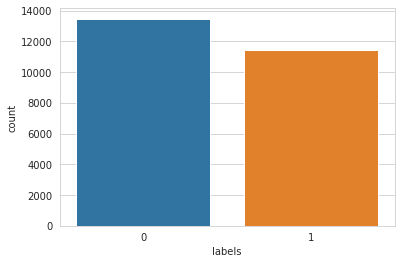

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

target = proper_news['labels']
sns.set_style('whitegrid')
sns.countplot(target)

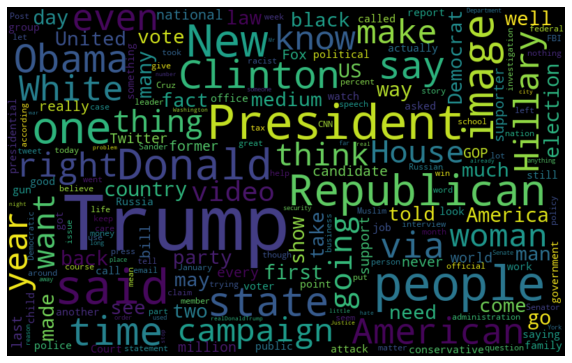

In [ ]:
from wordcloud import WordCloud
fake_data = proper_news[proper_news['labels'] == 0]
# fake_data

all_words = ' '.join([text for text in fake_data.Article])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

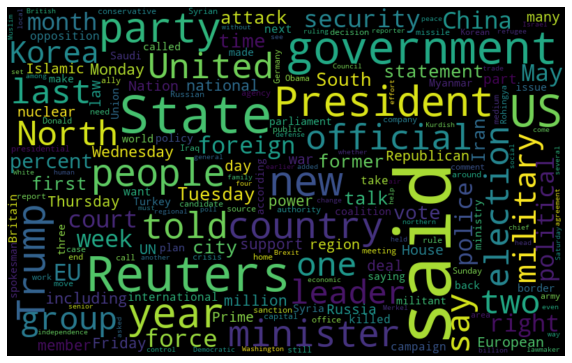

In [ ]:
from wordcloud import WordCloud
true_data = proper_news[proper_news['labels'] == 1]
# fake_data

all_words = ' '.join([text for text in true_data.Article])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**SPLITTING THE DATA**

In [ ]:
proper_news

,Article,labels
10000,Arizona man challenge primary result alleging ...,1
10001,Vatican trip could boost Sanders fight Clinton...,1
10002,Exclusive Blocking Trump could hurt Republican...,1
10003,Prosecutors say exHouse Speaker Hastert sexual...,1
10004,Senate primaryrace pressure work Obamas court ...,1
...,...,...
13476,RIDICULOUS SECRET SERVICE Investigating “Possi...,0
13477,HILLARY PANDERS DOMESTIC TERRORISTS Woman Whos...,0
13478,FLASHBACK Watch Hillary Accuse Obama Plagiaris...,0
13479,WATCH RUDY GIULIANI Rock Crowd Cleveland Barnb...,0


In [ ]:
X = proper_news['Article']
y = proper_news['labels']

X_t = proper_news['Article'].iloc[10000:12000]
y_t = proper_news['labels'].iloc[10000:12000]

Xxx_t = proper_news['Article'].iloc[-1500:]
Yyy_t = proper_news['labels'].iloc[-1500:]

XXXX = pd.concat([X_t,Xxx_t])
YYYY = pd.concat([y_t,Yyy_t])





from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(XXXX,YYYY,test_size=0.20,random_state=42)



**NAIVE BAYES**

In [ ]:
from collections import defaultdict
class Naive:
    
    def __init__(self, unique_label):
        self.classes = unique_label
        
    def Bow(self,article,label):
        if isinstance(article,np.ndarray): article = article[0]
        for word in article.split():
            self.bow_dicts[label][word] += 1
            
    def train(self, data, labels):
        self.news = data
        self.labels = labels
        self.bow_dicts = np.array([defaultdict(lambda: 0) for index in range(self.classes.shape[0])])#initializes 2 bag of words with 0 words
        if not isinstance(self.news, np.ndarray): self.news = np.array(self.news)
        if not isinstance(self.labels, np.ndarray): self.labels = np.array(self.labels)
        for index, category in enumerate(self.classes):
            all_category_news = self.news[self.labels == category]#selects all article of a particular category
            all_category_news = pd.DataFrame(data=all_category_news)
            np.apply_along_axis(self.Bow, 1, all_category_news, index)
            #clean_category_articles = cleaning(all_category_news)
            #cleaned_category_articles = pd.DataFrame(data=clean_category_articles)#converts series to df
            #np.apply_along_axis(self.Bow, 1, cleaned_category_articles, index)

        prior_prob = np.empty(self.classes.shape[0])
        all_words = []
        category_word_counts = np.empty(self.classes.shape[0])
        for index, category in enumerate(self.classes):
           prior_prob[index] = np.sum(self.labels == category)/float(self.labels.shape[0])
           count=list(self.bow_dicts[index].values())

           category_word_counts[index] = np.sum(np.array(list(self.bow_dicts[index].values()))) + 1
           all_words += self.bow_dicts[index].keys()#adds all words of this category to all words list
               
        self.vocab = np.unique(np.array(all_words))#computes the entire vocabulary of words being used
        self.vocab_length = self.vocab.shape[0]
            #the denominator is c+v+1, c is words of category c, v is total words, 1 for smoothing
        denominator = np.array([category_word_counts[index]+self.vocab_length+1 for index, category in enumerate(self.classes)])
            # in the line below we made a tuple for each category comprising of the BOW, prior prob, words of category
        self.category_info = [(self.bow_dicts[index], prior_prob[index], denominator[index]) for index, category in enumerate(self.classes)]
        self.category_info = np.array(self.category_info)
        
        
    def getprob(self,test_article):
        likelihood_prob = np.zeros(self.classes.shape[0])  # to store probability w.r.t each class
        for index, category in enumerate(self.classes):
            for word in test_article.split():
                test_word_counts = self.category_info[index][0].get(word, 0) + 1 #counting occurence of each word in bow of a particular category, 1 for smoothing
                test_word_prob = test_word_counts / float(self.category_info[index][2])
                likelihood_prob[index]+=np.log(test_word_prob)
             
        post_prob = np.empty(self.classes.shape[0])#posterior probability list
        for index, category in enumerate(self.classes):
            post_prob[index] = likelihood_prob[index] + np.log(self.category_info[index][1])#posterior=likelihood*prior we have taken log of the RHS and directly store that to avoid undeflow
        return post_prob
        
        
    def test(self, test_set):
        predictions = []  # to store prediction of each test example

        for example in test_set:
            post_prob = self.getprob(example)  # get prob of this example for both classes
            predictions.append(self.classes[np.argmax(post_prob)])
        return np.array(predictions)
                      

In [ ]:
nb = Naive(np.unique(y_train)) #instantiate a NB class object
print ("---------------- Training In Progress --------------------")
 
nb.train(X_train,y_train) #start tarining by calling the train function
print ('----------------- Training Completed ---------------------')

---------------- Training In Progress --------------------
----------------- Training Completed ---------------------


In [ ]:
pclasses=nb.test(X_test) #get predcitions for test set

#check how many predcitions actually match original test labels
test_acc=np.sum(pclasses==y_test)/float(y_test.shape[0]) 

print ("Test Set Examples: ",y_test.shape[0]) 
print ("Test Set Accuracy: ",test_acc*100,"%")

Test Set Examples:  700
Test Set Accuracy:  99.71428571428571 %


[[388   2]
 [  0 310]]


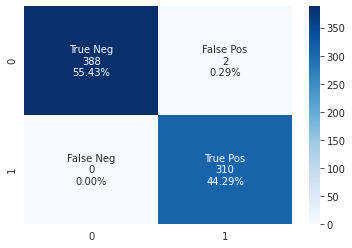

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
labels = ['true','fake']
print(confusion_matrix(y_test,pclasses))
cm = confusion_matrix(y_test,pclasses)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

**FEATURE EXTRACTION**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
train_x = vectorizer.fit_transform(X_train).toarray()
test_x = vectorizer.transform(X_test).toarray()

**LOGISTIC REGRESSION**

In [ ]:
import numpy as np

class LogisticRegressions:

    def __init__(self, learning_rate=0.1, n_iters=1500):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fits(self, X, y):
        n_samples, n_features = X.shape
        
        
        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.6 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

**TRAINING THE MODEL**

In [ ]:
LRs = LogisticRegressions()


In [ ]:
y_train

20162    1
21001    1
301      0
21003    1
21233    1
        ..
21095    1
21130    1
21294    1
20860    1
13155    0
Name: labels, Length: 2800, dtype: int64

In [ ]:
LRs.fits(train_x,y_train)

In [ ]:
def accuracy(y_true,y_pred):
    accuracy = np.sum(y_true==y_pred)/len(y_true)
    
    return accuracy

In [ ]:
ytest = np.array(y_test)

In [ ]:
ytest

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,

**TESTING THE MODEL**

In [ ]:
predictions = LRs.predict(test_x)
print("accuracy :",accuracy(ytest,predictions))


accuracy : 0.9942857142857143


In [ ]:
predictions = LRs.predict(test_x)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(y_test,predictions))

[[388   2]
 [  2 308]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       390
           1       0.99      0.99      0.99       310

    accuracy                           0.99       700
   macro avg       0.99      0.99      0.99       700
weighted avg       0.99      0.99      0.99       700



In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y_test,predictions)

0.9942857142857143

In [ ]:

labels = ['true','fake']

cm = confusion_matrix(y_test,predictions)

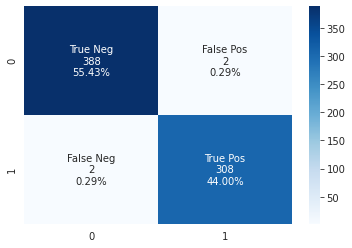

In [ ]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')